# W+c Analysis (charm tagging)

In [1]:
import ROOT as rt
import uproot as uprt
import mplhep as mh
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np

In [18]:
# Defining the style for plots (CMS Style)
plt.style.use(mh.style.CMS)
plt.rcParams.update({
    "font.size": 17,
    "axes.labelsize": 17,
    "axes.titlesize": 17,
    "xtick.labelsize": 17,
    "ytick.labelsize": 17,
    "legend.fontsize": 17
})

# Defining the function for making histograms
def make_hist(data, bins, range, xlabel, ylabel, label, fname=None, logy=False):
    histo, edges = np.histogram(data, bins=bins, range=range)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    mh.histplot(histo, edges, histtype="step", label=label, ax=ax)
    mh.cms.label("Open Data", data=True, lumi=None, com=13, year=2016, loc=0)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    if logy:
        ax.set_yscale("log")
    if fname:
        plt.savefig(fname)
    plt.show()

In [26]:
# Loading the ROOT file

NanoAODFile = uprt.open("datasets/nano106X_on_mini106X_2017_mc_NANOAOD_W1Jets_to_LNu.root")
Events = NanoAODFile["Events"]

In [27]:
# We are interested in the RecoJets collections
RecoJet_keys = Events.keys(filter_name="Jet_*")
for RecoJets in Events.iterate(RecoJet_keys, step_size=Events.num_entries, library="ak"):
    break
# RecoJets

In [28]:
# Muons and electrons Collections
RecoMuon_keys = Events.keys(filter_name="Muon_*")
for RecoMuons in Events.iterate(RecoMuon_keys, step_size=Events.num_entries, library="ak"):
    break

RecoElectron_keys = Events.keys(filter_name="Electron_*")
for RecoElectrons in Events.iterate(RecoElectron_keys, step_size=Events.num_entries, library="ak"):
    break

In [44]:
# We are also interested in the GenJets collections
GenJet_keys = Events.keys(filter_name="GenJet_*")
for GenJets in Events.iterate(GenJet_keys, step_size=Events.num_entries, library="ak"):
    break
# GenJets

MET_keys = Events.keys(filter_name="MET_*")
for METs in Events.iterate(MET_keys, step_size=Events.num_entries, library="ak"):
    break

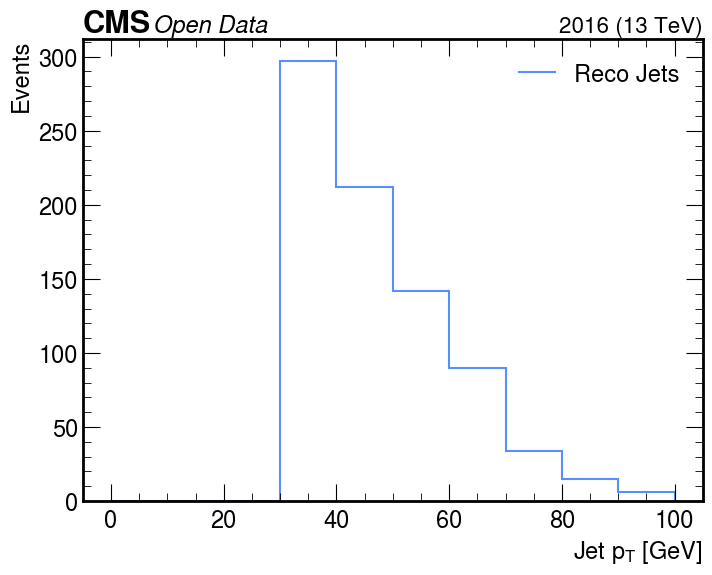

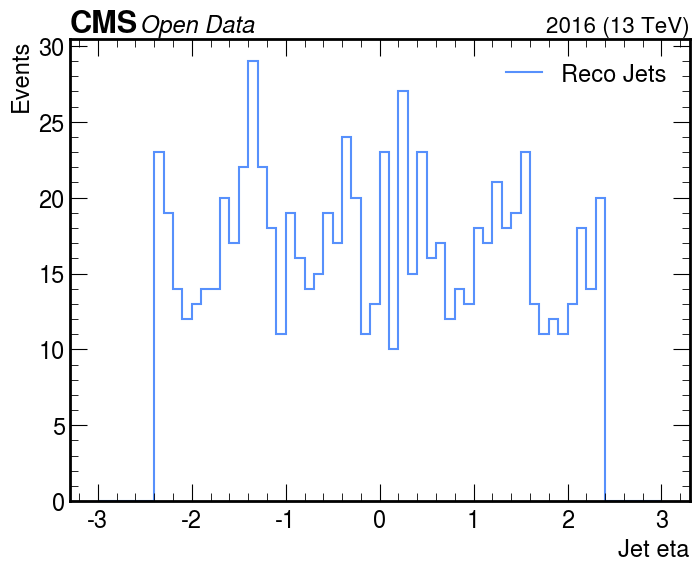

In [ ]:
passCuts = (RecoJets["Jet_pt"] > 30) & (abs(RecoJets["Jet_eta"]) < 2.4)
RecoJet_EvtSel = RecoJets[passCuts]

RecoJet_pT = ak.to_numpy(ak.flatten(RecoJet_EvtSel["Jet_pt"]))

make_hist(RecoJet_pT,
            bins=10,
            range=(0, 100),
            xlabel="Jet $p_{T}$ [GeV]",
            ylabel="Events",
            label="Reco Jets",
            fname="Plots/RecoJet_pT_WcAnalysis.png",
            logy=False)

RecoJet_eta = ak.to_numpy(ak.flatten(RecoJet_EvtSel["Jet_eta"]))

make_hist(RecoJet_eta,
            bins=60,
            range=(-3, 3),
            xlabel="Jet eta",
            ylabel="Events",
            label="Reco Jets",
            fname="Plots/RecoJet_eta_WcAnalysis.png",
            logy=False)

In [57]:
# Event Selection : W+c 
# Muons: HLT IsoMu24 OR HLT IsoTkMu24
# Rochester Corrections for Muons
# Muon Pt > 35 GeV, |eta| < 2.4
# I_comb = Sum(Pt(chargedhadrons)) + Et(neutralhadrons) + Et(photons) - Sum(pt(pileup))
# I_comb / pt(muon) < 0.15
# MET pt > 55 GeV

# This is the isolation cut (I_comb)
Muon_Pt_Cut = (RecoMuons["Muon_pt"] > 35)
Muon_pfIso_Cut = (abs(RecoMuons["Muon_pfRelIso04_all"] < 0.15))
METs_cut = METs["MET_pt"] > 55

Selected_Events = Muon_Pt_Cut & Muon_pfIso_Cut 

Selected_Muons = RecoMuons[Selected_Events]
Selected_Muons

<Array [{Muon_dxy: [], ...}, {...}, ..., {...}] type='1000 * {Muon_dxy: var...'>

In [45]:
print(Events.keys(filter_name="MET_*"))

['MET_MetUnclustEnUpDeltaX', 'MET_MetUnclustEnUpDeltaY', 'MET_covXX', 'MET_covXY', 'MET_covYY', 'MET_phi', 'MET_pt', 'MET_significance', 'MET_sumEt', 'MET_sumPtUnclustered', 'MET_fiducialGenPhi', 'MET_fiducialGenPt']
